In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load image
img = cv2.imread('glassbottle.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Optional: Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5,5), 0)


In [5]:
edges = cv2.Canny(blur, threshold1=30, threshold2=100)


In [6]:
# Kernel for morphology
kernel = np.ones((3,3), np.uint8)

# Close small gaps in cracks
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

# Remove small noise
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=1)


In [7]:
# Find contours
contours, hierarchy = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy original image for annotation
annotated = img.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 20:  # Filter tiny noise
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(annotated, (x, y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(annotated, 'Defect', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)


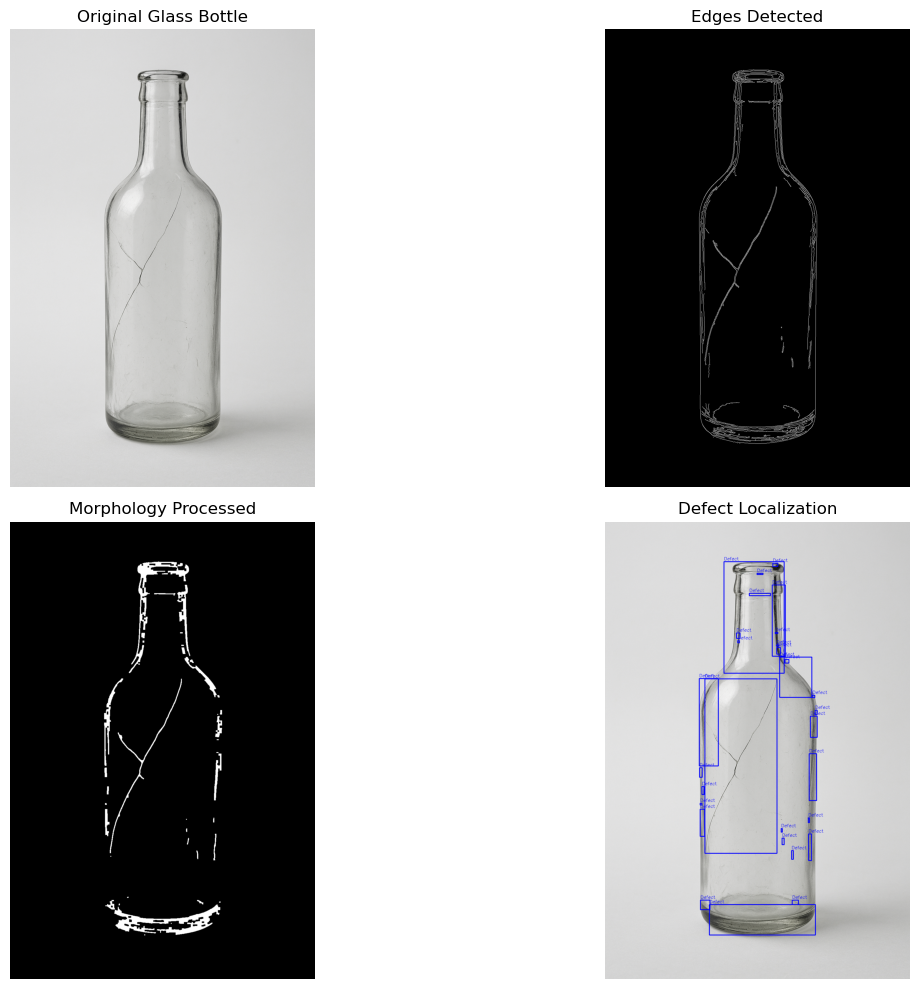

In [8]:
# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Original Glass Bottle")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(opened, cmap='gray')
plt.title("Morphology Processed")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(annotated_rgb)
plt.title("Defect Localization")
plt.axis('off')

plt.tight_layout()
plt.show()
